In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('churn-bigml-80.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Признаки по одному
**1.1 Количественные признаки**

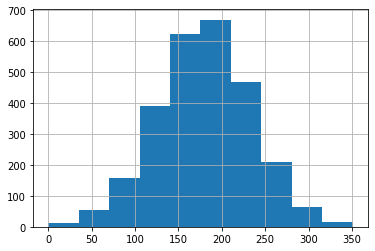

In [4]:
df['Total day minutes'].hist();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


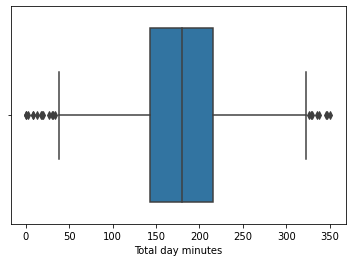

In [5]:
sns.boxplot(df['Total day minutes']);

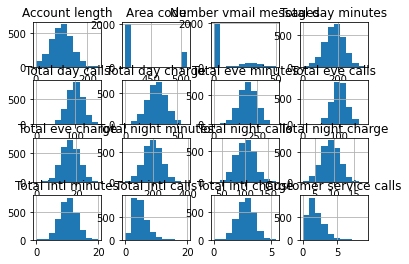

In [6]:
df.hist();

**1.2. Категориальные признаки**

In [7]:
df['State'].value_counts().head()

WV    88
MN    70
NY    68
VA    67
AL    66
Name: State, dtype: int64

In [8]:
df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


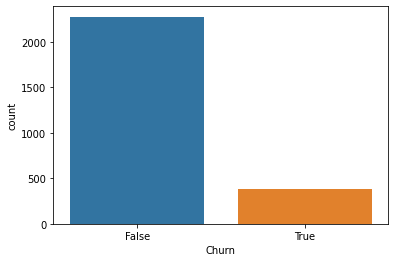

In [9]:
sns.countplot(df['Churn']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


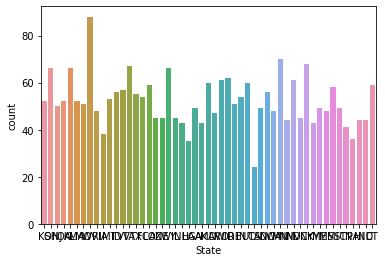

In [10]:
sns.countplot(df['State']);

In [11]:
df['State'].value_counts().head().index

Index(['WV', 'MN', 'NY', 'VA', 'AL'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


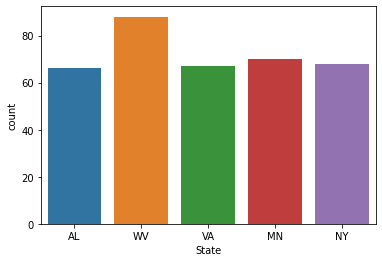

In [12]:
sns.countplot(df[df['State'].isin(df['State'].\
                                  value_counts().head().index)]['State']);

# Взаимодействия
**2.1. Количественные с количественными**

In [13]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [14]:
feat = [f for f in df.columns if 'charge' in f];

In [15]:
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

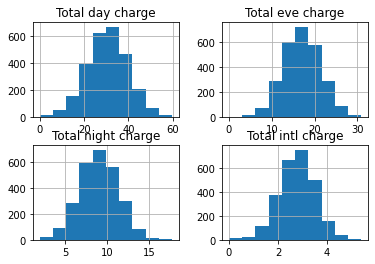

In [16]:
df[feat].hist();

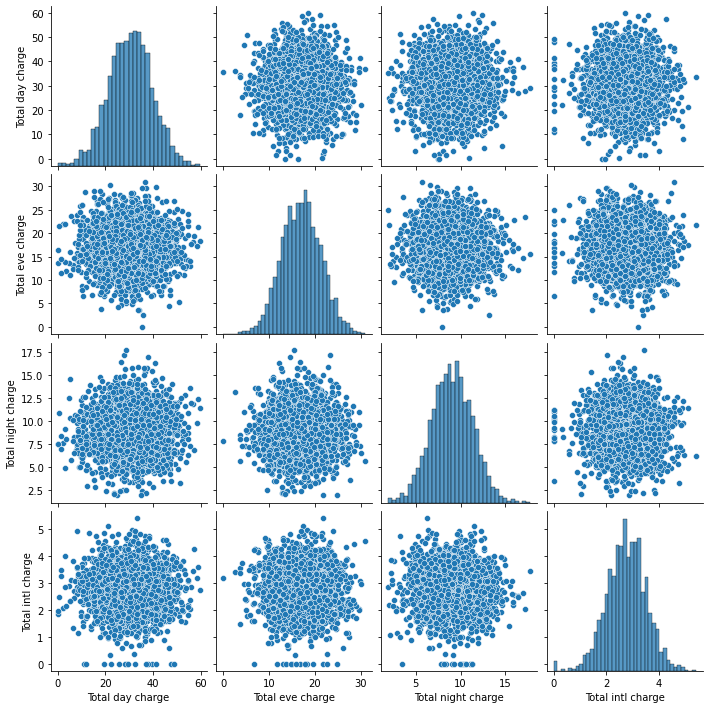

In [17]:
sns.pairplot(df[feat]);

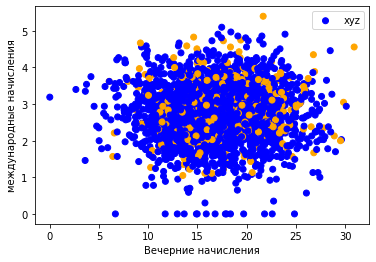

In [18]:
plt.scatter(df['Total eve charge'], df['Total intl charge'],
            color=df['Churn'].map({False: 'blue', True: 'orange'}),
            label='xyz');
plt.xlabel('Вечерние начисления');
plt.ylabel('международные начисления');
plt.legend();

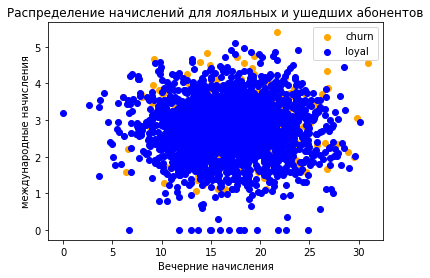

In [19]:
plt.scatter(df[df['Churn']]['Total eve charge'], df[df['Churn']]['Total intl charge'],
            color='orange',
            label='churn');
plt.scatter(df[~df['Churn']]['Total eve charge'], df[~df['Churn']]['Total intl charge'],
            color='blue', 
            label='loyal');
plt.xlabel('Вечерние начисления');
plt.ylabel('международные начисления');
plt.legend();
plt.title('Распределение начислений для лояльных и ушедших абонентов');

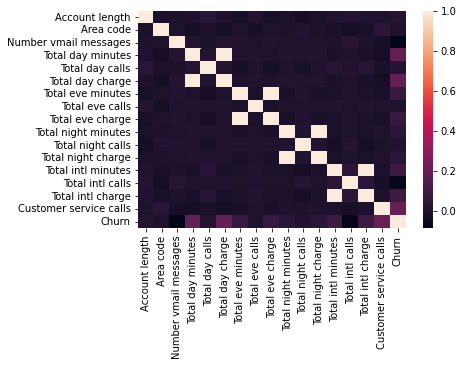

In [20]:
sns.heatmap(df.corr());

In [21]:
df.drop(feat, axis=1, inplace=True)

In [22]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

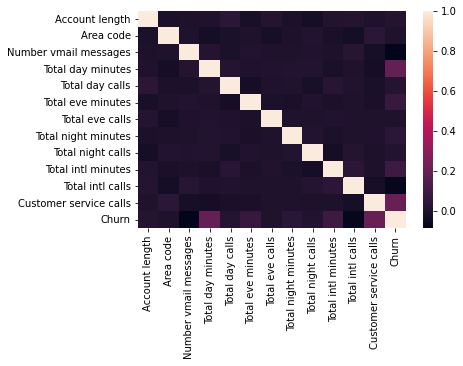

In [23]:
sns.heatmap(df.corr());

**2.2. Количественные с категориальными + количественные и бинарные**

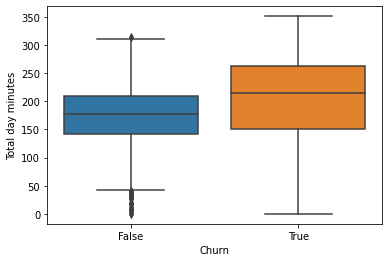

In [24]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);

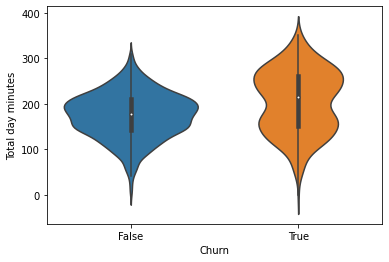

In [25]:
sns.violinplot(x='Churn', y='Total day minutes', data=df);

In [26]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.580092
Yes    187.481852
Name: Total day minutes, dtype: float64

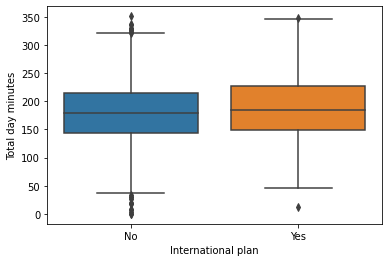

In [27]:
sns.boxplot(x='International plan', y='Total day minutes', data=df);

**2.3. Категориальные с категориальными** 

In [28]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2126,152
True,270,118


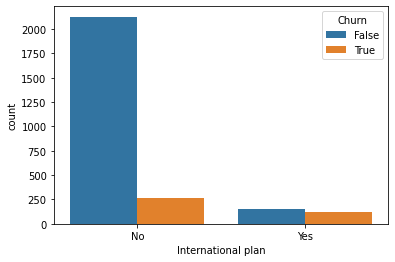

In [29]:
sns.countplot(x='International plan', hue='Churn', data=df)

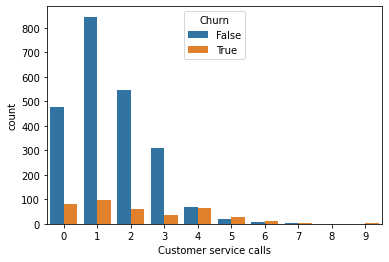

In [30]:
sns.countplot(x='Customer service calls', hue='Churn', data=df) 

In [31]:
from sklearn.manifold import TSNE

In [32]:
tsne = TSNE(random_state=0)

In [33]:
df2 =df.drop('State', axis=1)

In [34]:
df2['International plan'] = df2['International plan'].map({'Yes': 1, 'No': 0})
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [35]:
df2.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Area code               2666 non-null   int64  
 2   International plan      2666 non-null   int64  
 3   Voice mail plan         2666 non-null   int64  
 4   Number vmail messages   2666 non-null   int64  
 5   Total day minutes       2666 non-null   float64
 6   Total day calls         2666 non-null   int64  
 7   Total eve minutes       2666 non-null   float64
 8   Total eve calls         2666 non-null   int64  
 9   Total night minutes     2666 non-null   float64
 10  Total night calls       2666 non-null   int64  
 11  Total intl minutes      2666 non-null   float64
 12  Total intl calls        2666 non-null   int64  
 13  Customer service calls  2666 non-null   int64  
 14  Churn                   2666 non-null   

In [37]:
tsne.fit(df2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE(random_state=0)

In [38]:
tsne.fit_transform(df2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[ 48.67161 ,  20.792938],
       [ 14.081528,  19.633823],
       [ 66.1167  ,  11.934961],
       ...,
       [ 30.74735 ,  24.381994],
       [-58.570988, -17.395784],
       [ 43.70155 ,  19.727865]], dtype=float32)

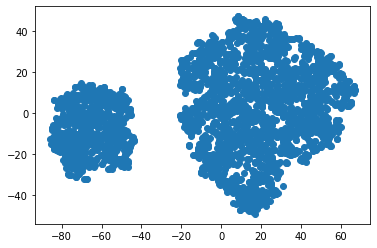

In [39]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])

In [40]:
tsne.embedding_[df2['Churn'].values, 0].shape

(388,)

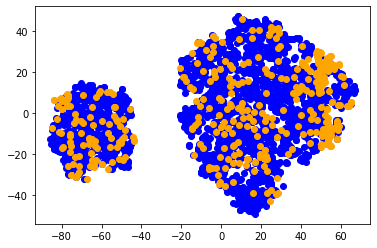

In [45]:
plt.scatter(tsne.embedding_[~df2['Churn'].values, 0],
            tsne.embedding_[~df2['Churn'].values, 1], color='blue');
plt.scatter(tsne.embedding_[df2['Churn'].values, 0],
            tsne.embedding_[df2['Churn'].values, 1], color='orange');